# SVM Implementation using Pegasos
=> Formulating SVM as Unconstrainted Optimization Problem


# Generate Dataset

In [21]:
from sklearn.datasets import make_classification
from matplotlib import pyplot as plt
import numpy as np

In [13]:
X,Y = make_classification(n_classes=2,n_samples=400,n_clusters_per_class=1,n_features=2,n_informative=2,n_redundant=0,random_state=3)

In [35]:
# Convert our Y-Labels into {1,-1}
Y[Y==0] = -1

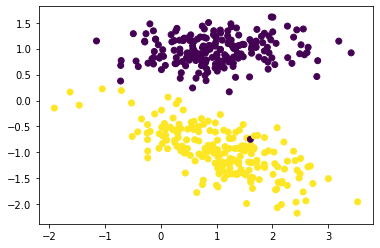

In [36]:
plt.scatter(X[:,0],X[:,1],c=Y)
plt.show()

In [48]:
class SVM:
    
    def __init__(self,C=1.0):
        self.C = C
        self.W = 0
        self.b = 0
        
    def hingeLoss(self,W,b,X,Y):
        loss = 0.0
        loss += 0.5*np.dot(W,W.T)
        
        m = X.shape[0]
        
        for i in range(m):
            ti = Y[i]*(np.dot(W,X[i].T)+b)
            loss += self.C*max(0,(1-ti))
        
        return loss[0][0]
    
    def fit(self,X,Y,batch_size=100,learning_rate=0.001,maxItr=300):
        
        no_of_features = X.shape[1]
        no_of_samples = X.shape[0]
        
        n = learning_rate
        c = self.C
        
        # Init the model parameters
        
        W = np.zeros((1,no_of_features))
        bias = 0
        
        # Initial Loss
        print(self.hingeLoss(W,bias,X,Y))
        
        # Training from here....
        # Weight ans Bias update rule , earlier discussed....
        
        losses = []
        
        for i in range(maxItr):
            #Training Loop
            
            l = self.hingeLoss(W,bias,X,Y)
            losses.append(l)
            ids = np.arange(no_of_samples)
            np.random.shuffle(ids)
            # Batch Gradient Descent(paper) with random shuffling
            for batch_start in range(0,no_of_samples,batch_size):
                # Assume 0 gradient for the batch
                gradw = 0
                gradb = 0
                
                # Iterate over all examples in the mini batch
                for j in range(batch_start,batch_start+batch_size):
                    if j<no_of_samples:
                        i = ids[j]
                        ti = Y[i]*(np.dot(W,X[i].T)+bias)
                        if ti>1:
                            gradw += 0
                            gradb += 0
                        else:
                            gradw += c*Y[i]*X[i]
                            gradb += c*Y[i]
                            
                # Gradient for the batch is ready ! Update W,B
                W = W -n*W + n*gradw
                bias = bias + n*gradb
                
        self.W = W
        self.b = bias
        return W,bias,losses

In [65]:
mySVM = SVM()
W,b,losses = mySVM.fit(X,Y)

400.0


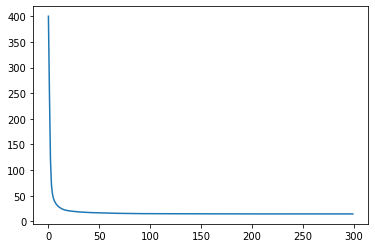

In [66]:
plt.plot(losses)
plt.show()

In [72]:
W,B = mySVM.W,mySVM.b
print(W,B)

[[-0.34599035 -2.09144869]] 0.42400000000000027


# Visualizing Decision Boundries and HyperPlane

In [70]:

def plotHyperplane(w1,w2,b):
    
    plt.figure(figsize=(12,12))
    x_1 = np.linspace(-2,4,10)
    x_2 = -(w1*x_1+b)/w2  # WT + B =0
    
    x_p = -(w1*x_1+b+1)/w2  # WT + B =-1
    x_n = -(w1*x_1+b-1)/w2  # WT + B =+1
    
    plt.plot(x_1,x_2,label="HyperPlane WX+B=0")
    plt.plot(x_1,x_p,label="+ve HyperPlane WX+B=1")
    plt.plot(x_1,x_n,label="-ve HyperPlane WX+B=-1")
    plt.scatter(X[:,0],X[:,1],c=Y)
    plt.legend()
    plt.show()
    


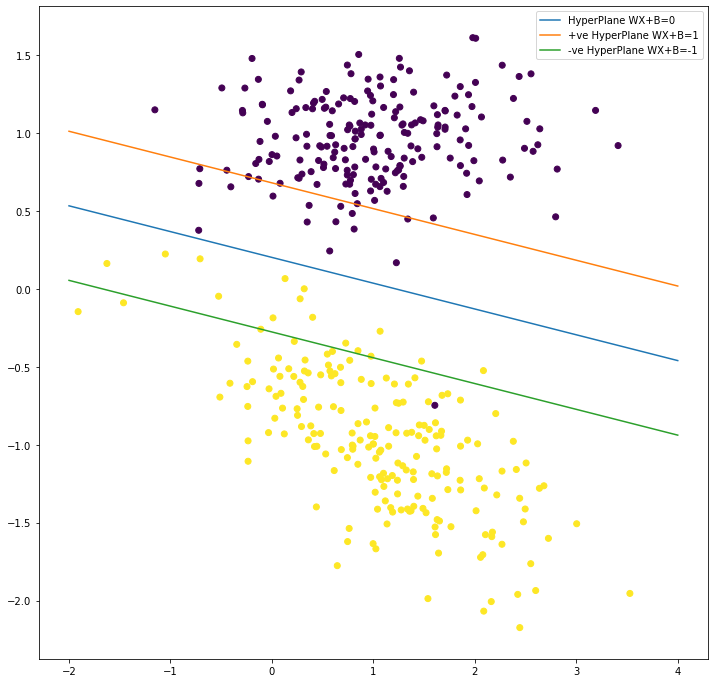

In [71]:
plotHyperplane(W[0,0],W[0,1],B)

In [73]:
# Effect of changing C : - Penality constant
mySVM = SVM(C=1000)
W,b,losses = mySVM.fit(X,Y)
print(losses[-1])

400000.0
13530.602056693515


In [74]:
W,B = mySVM.W,mySVM.b
print(W,B)

[[ -5.03171355 -19.27336856]] 3.0


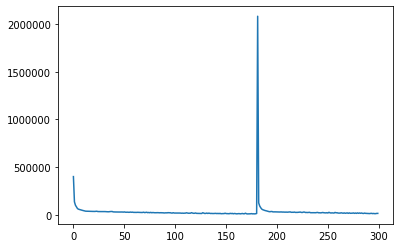

In [75]:
plt.plot(losses)
plt.show()

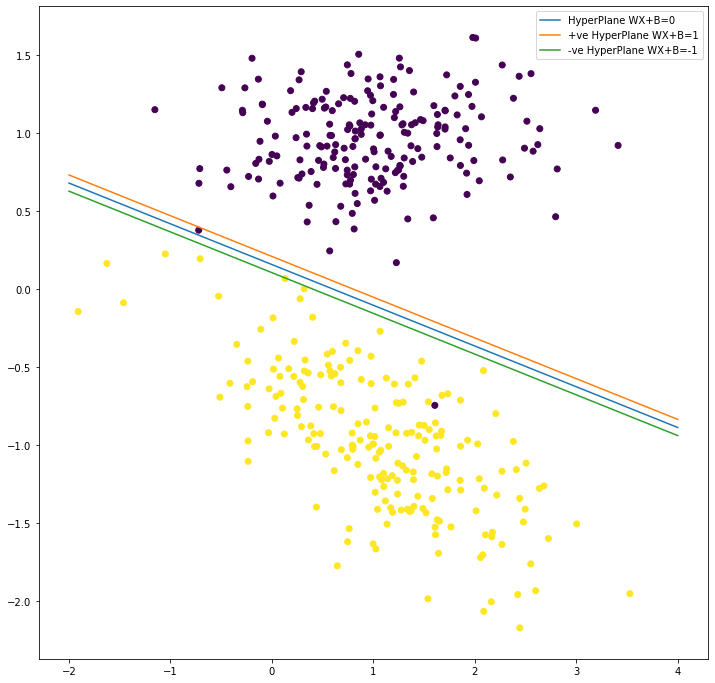

In [76]:
plotHyperplane2(W[0,0],W[0,1],B)
# we can cleary observe that if penalty is very high , it reduces the loss but also reducing margin 

# SVM on Non Linealy seperable dataset

In [6]:
from sklearn.datasets import make_circles
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

In [15]:
# generate data

X,Y = make_circles(n_samples=500,noise=0.02)
print(X.shape,Y.shape)

(500, 2) (500,)


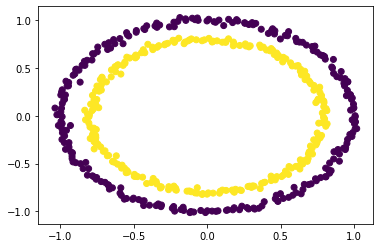

In [16]:
plt.scatter(X[:,0],X[:,1],c=Y)
plt.show()

In [17]:
# Project data in higher dimensions

def phi(X):
    # None linear Transformation
    X1 = X[:,0]
    X2 = X[:,1]
    X3 = X1**2 + X2**2
    
    X_ = np.zeros((X.shape[0],3))
    print(X_.shape)
    
    X_[:,:-1] = X
    X_[:,-1] = X3
    
    return X_

In [18]:
X_ = phi(X)

(500, 3)


In [19]:
print(X[:3,:])

[[-0.98484238 -0.17741916]
 [ 0.75147769  0.28436899]
 [ 0.51810217 -0.62234237]]


In [20]:
print(X_[:3,:])

[[-0.98484238 -0.17741916  1.00139207]
 [ 0.75147769  0.28436899  0.64558444]
 [ 0.51810217 -0.62234237  0.65573988]]


In [40]:
# Visualize new dataset

def plot3d(X,show=True):
    fig = plt.figure(figsize=(10,10))
    ax = fig.add_subplot(111,projection='3d')
    X1 = X[:,0]
    X2 = X[:,1]
    X3 = X[:,2]
    
    ax.scatter(X1,X2,X3,zdir='z',s=20,c=Y,depthshade=True)
    if show==True:
        plt.show()
    return ax

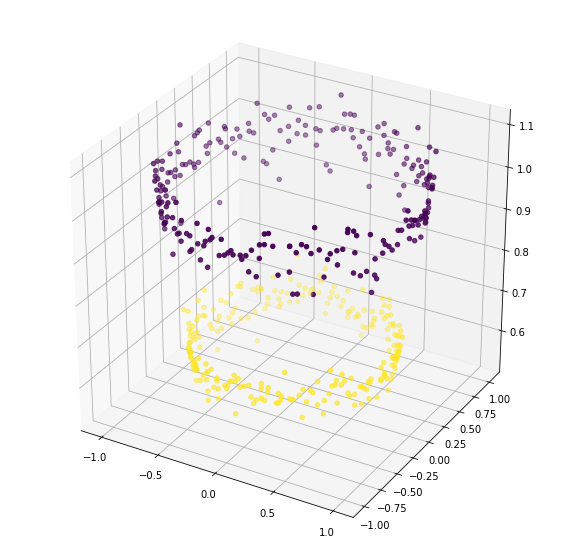

In [41]:
ax = plot3d(X_)

# Logistic Classifier

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

In [28]:
lr = LogisticRegression()

In [30]:
# Accuracy of Logistic Classifier on 2d data
acc = cross_val_score(lr,X,Y,cv=5).mean()
print("Accuracy X(2D) is %.4f"%(acc*100))

Accuracy X(2D) is 44.2000


In [ ]:
# Not good accuracy on 2d data

In [31]:
# Accuracy of Logistic Classifier on 3d data
acc = cross_val_score(lr,X_,Y,cv=5).mean()
print("Accuracy X(3D) is %.4f"%(acc*100))

Accuracy X(3D) is 100.0000


In [ ]:
# Acuuracy is 100%, pretty awessome

# Visualise the Decision Surface

In [32]:
lr.fit(X_,Y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [37]:
wts = lr.coef_
bias = lr.intercept_
print(wts)
print(bias)

[[-4.91770075e-03 -1.98373052e-02 -1.08341679e+01]]
[8.85865549]


In [36]:
xx,yy = np.meshgrid(range(-2,2),range(-2,2))
print(xx)
print(yy)

[[-2 -1  0  1]
 [-2 -1  0  1]
 [-2 -1  0  1]
 [-2 -1  0  1]]
[[-2 -2 -2 -2]
 [-1 -1 -1 -1]
 [ 0  0  0  0]
 [ 1  1  1  1]]


In [38]:
z = -(wts[0,0]*xx + wts[0,1]*yy + bias)/wts[0,2]
print(z)

[[0.82222886 0.82177496 0.82132105 0.82086714]
 [0.82039787 0.81994396 0.81949005 0.81903615]
 [0.81856687 0.81811297 0.81765906 0.81720515]
 [0.81673588 0.81628197 0.81582806 0.81537416]]


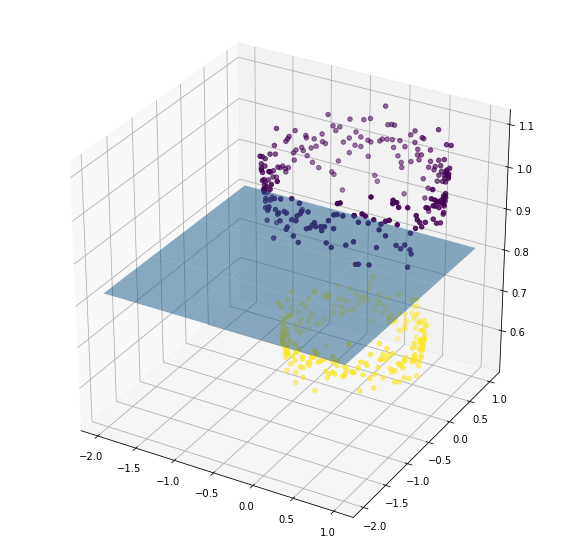

In [46]:
ax = plot3d(X_,False)
ax.plot_surface(xx,yy,z,alpha=0.5)
plt.show()

### SVM = 'Kernel Trick' Based Formulation

In [ ]:
# Learn more about Kernel via blog by 'towardsdatascience'

# Sklearn supports the following types of Kernels, which can be used in many-real life problems.
    => Linear Kernel
    => RBF Kernel
    => Polynomial Kernel
    => Sigmoid Kernel

In [ ]:
""""Kernal trick is method of using a linear classifier to solve a non-linear problem.It transforms the linearly in-
seperable data into linnearly seperable one. """

In [47]:
from sklearn import svm

# Linear Kernel SVM

In [52]:
svc = svm.SVC(kernel="linear")# default is RBF kernel

In [53]:
svc.fit(X,Y)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [54]:
# Linear Kernel Result
svc.score(X,Y) 

0.504

# RBF Kernel SVM

In [56]:
svc = svm.SVC(kernel="rbf")

In [57]:
svc.fit(X,Y)
svc.score(X,Y)

1.0

## Polynomial Kernel SVM

In [58]:
svc = svm.SVC(kernel="poly")
svc.fit(X,Y)
svc.score(X,Y)

0.532

### Sigmoid Kernel SVM

In [61]:
svc = svm.SVC(kernel='sigmoid')
svc.fit(X,Y)
svc.score(X,Y)

0.494

# Custom Kernel

In [63]:
def custom_kernel(x1,x2):
    return np.square(np.dot(x1,x2.T))

svc = svm.SVC(kernel = custom_kernel)
svc.fit(X,Y)
svc.score(X,Y)

1.0

# MNIST Dataset Classification

In [64]:
from sklearn.datasets import load_digits
from sklearn.model_selection import GridSearchCV
from sklearn import svm

In [66]:
params = [
    {
        'kernel':['linear','rbf','poly','sigmoid'],
        'C':[0.1,0.2,0.5,1.0,2.0,5.0]
    }
]

## Data Prepare

In [68]:
data = load_digits()
X = data.data
Y = data.target
print(X.shape,Y.shape)

(1797, 64) (1797,)


#### Logistic Regression

In [72]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

In [82]:
import multiprocessing
cpus = multiprocessing.cpu_count()
print(cpus)

4


In [73]:
lr = LogisticRegression()
lr.fit(X,Y)
cross_val_score(lr,X,Y,scoring="accuracy",cv=5).mean()

C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regressio

0.9137650882079852

In [ ]:
# Logistic Regression gives accuracy of 91.57 %

In [74]:
from sklearn import svm

In [78]:
svc = svm.SVC()
svc.fit(X,Y)
cross_val_score(svc,X,Y,scoring="accuracy",cv=5).mean()

0.9632838130609718

## If bad result??

## Not Using right set of params!!!

In [84]:
gs = GridSearchCV(estimator=svm.SVC(),param_grid=params,scoring="accuracy",cv=5,n_jobs=cpus)

In [85]:
gs.fit(X,Y)

GridSearchCV(cv=5, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=4,
             param_grid=[{'C': [0.1, 0.2, 0.5, 1.0, 2.0, 5.0],
                          'kernel': ['linear', 'rbf', 'poly', 'sigmoid']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [86]:
gs.best_estimator_

SVC(C=5.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [87]:
gs.best_score_

0.9738502011761063

In [ ]:
## SVM with rbf kernel , C = 5.0 gives best result
## change C and observe the result